# Inferência Estatística

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

## Análise dos dados de acidentes em Barcelona em 2013

O conjunto de dados referem-se a acidentes de trânsito em Barcelona ocorridos em 2013. Os dados originais podem ser encontrados nessse endereço: [http://opendata.bcn.cat/](http://opendata.bcn.cat/).

In [5]:
data = pd.read_csv('../data/ACCIDENTS_GU_BCN_2013.csv', encoding = 'unicode_escape', engine ='python')
data.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [14]:
data['Date'] = data['Dia de mes'].apply(lambda x: str(x)) + '-' + data['Mes de any'].apply(lambda x: str(x)) + '-2013'
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [15]:
data.head(2)

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,Tarda,Desconegut,0,1,0,1,2,-1,-1,2013-10-16
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41",2013-10-29


In [19]:
accidents = data.groupby(['Date']).size()
print(f"A média de acidentes por dia no ano de 2013 foi de {accidents.mean():.1f}.")

A média de acidentes por dia no ano de 2013 foi de 25.9.


### Distribuição das médias amostrais

Consideremos a distribuição empírica das médias de $s = 10.000$ amostras com tamanho $n = 200$.

In [146]:
# população
df = accidents.to_frame()
N_test = 10000
elements = 200
# array de médias das amostras
means = np.zeros(N_test)
# geração das amostras
for i in range(N_test):
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.values.mean()

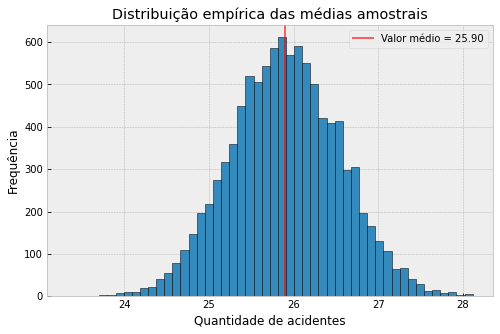

In [147]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(means, bins=50, edgecolor='k')
plt.axvline(means.mean(), color='r', alpha=.6, label=f"Valor médio = {means.mean():.2f}")
ax.set_axisbelow(True)
ax.set_xlabel('Quantidade de acidentes')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição empírica das médias amostrais')
plt.legend()
plt.show()

- Erro padrão ($SE$):

$$SE = \dfrac{\sigma_x}{\sqrt{n}}$$

In [148]:
rows = np.random.choice(df.index.values, elements)
sampled_df = df.loc[rows]
est_sigma_mean = sampled_df.values.std() / np.sqrt(elements)

print(f"""
    Estimativa direta de SE para uma amostra de {elements} elementos: {est_sigma_mean:.4f}.
    Estimativa de SE por simulação de {N_test} amostras de {elements} elementos: {np.array(means).std():.5f}.
""")


    Estimativa direta de SE para uma amostra de 200 elementos: 0.6680.
    Estimativa de SE por simulação de 10000 amostras de 200 elementos: 0.64339.



In [38]:
means[0]

0    26.37
dtype: float64